In [1]:
# Importing necessary library
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
# from statsmodels.stats.outliers_influence import variance_inflation_factor
#import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# to display maximum columns
pd.set_option('display.max_columns', None) 

# Step 1: Understanding Data

In [3]:
# reading input data
leads_df = pd.read_csv('/Users/deveshparashar/Downloads/Lead Scoring Assignment/Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# dimensions of data
leads_df.shape

(9240, 37)

In [5]:
# checking columns null data
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 2: Data Cleaning

In [6]:
# checking for the duplicates
leads_df.duplicated().sum()

np.int64(0)

- There are no duplicate rows in our dataset

#### Inference:
- Many columns have single values, these single values won't help in understanding or identifying the distribution or pattern in the data, hence dropping these colummns.

In [7]:
# checking count of unique values in each column
leads_df.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

In [8]:
# dropping columns with only one unique values 
leads_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1, inplace=True)
leads_df.nunique().sort_values() 

Digital Advertisement                               2
X Education Forums                                  2
Newspaper Article                                   2
Search                                              2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
A free copy of Mastering The Interview              2
Through Recommendations                             2
Newspaper                                           2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Quality                                        5
Lead Origin                                         5
What is your current occupation                     6
Lead Profile                                        6
City                                                7
How did you hear about X Edu

In [9]:
# let's check the values in all the columns 
for col in leads_df.columns:
    print(leads_df[col].value_counts().head())
    print('\n')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
Name: count, dtype: int64


Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
Name: count, dtype: int64


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Lead Source
Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: count, dtype: int64


Do Not Email
No     8506
Yes     734
Name: count, dtype: int64


Do Not Call
No     9238
Yes       2
Name: count, dtype: int64


Converted
0    5679
1    3561
Name: count, dtype: int64


TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: count, dtype: int64


Total Ti

-  `Prospect ID` and `Lead Number` are both unique identifier of our leads. Let's drop prospect id and keep lead number. 
- We also saw that column `What matters most to you in choosing a course` 99% same values, rest are nulls. This column does not tell us much about the person and can be dropped as well. 
- Also most people are from India, hence let's drop `Country` column as it is not needed for our analysis and assigning score.  

In [10]:
# dropping more columns that won't help us in our analysis
leads_df.drop(columns=['Prospect ID', 'What matters most to you in choosing a course', 'Country'], inplace=True)

- We saw 'Select' as a value in few columns and can be treated as a missing value as it does not have any meaning to it. It simply means that the person did not select any option to that question while filling out the form.

In [11]:
# replacing value 'Select' with NULL
leads_df = leads_df.replace('Select', np.nan)

In [12]:

# checking columns having high number of missing values
round(leads_df.isnull().mean()*100, 2).sort_values(ascending=False).head(10)

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Activity Index           45.65
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Index            45.65
City                                  39.71
Specialization                        36.58
Tags                                  36.29
dtype: float64

#### Inference:
- Some columns have more than 35% missing values and with so many nulls it is hard do analyse. We will be dropping these columns.
- For the remaining ones, we will analyze and then take a call.

In [13]:
# removing columns having more than 35% missing values
cols=leads_df.columns[leads_df.isnull().mean() >= 0.35]
leads_df = leads_df.drop(cols, axis=1) 

In [14]:
# checking the null distribution again
round(leads_df.isnull().mean() * 100, 2).sort_values(ascending=False)

What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Newspaper Article                          0.00
A free copy of Mastering The Interview     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
X Education Forums                         0.00
Lead Number                                0.00
Search                                     0.00
Lead Origin                                0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Do Not Call                                0.00
Do Not Email                               0.00
Last Notable Activity                      0.00
dtype: float64

In [15]:
# checking distribtution of values for column 'What is your current occupation' 
leads_df['What is your current occupation'].value_counts(normalize=True) 

What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: proportion, dtype: float64

In [16]:
# checking distribution of values for column 'TotalVisits' and 'Page Views Per Visit'
leads_df[['TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [17]:
# checking median value
leads_df[['TotalVisits', 'Page Views Per Visit']].median()

TotalVisits             3.0
Page Views Per Visit    2.0
dtype: float64

In [18]:
# checking distribution of values for column 'Last Activity'
leads_df['Last Activity'].value_counts(normalize=True)

Last Activity
Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: proportion, dtype: float64

In [19]:
# checking distribution of values for column 'Lead Source'
leads_df['Lead Source'].value_counts(normalize=True)

Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: proportion, dtype: float64

### Inference:
- In column `What is your current occupation` imputing the 29% missing values with another category i.e. 'Not Provided'.
- For `Last Activity` and `Lead Source` column, imputing the missing values with their modes i.e. 'Email Opened' and 'Google' respectively.
- For `TotalVisits` and `Page Views Per Visit`, there is a difference between Mean and Median values due to presence of Outliers. Hence, imputing misisng values with their respective Medians.

In [20]:
# replacing nulls with 'Not Provided' in 'What is your current occupation' column
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not Provided')
leads_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Not Provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [21]:
# imputing missing values with mode for 'Last Activity' and 'Lead Source' column
replace_nan_with_mode = ['Last Activity', 'Lead Source']
for col in replace_nan_with_mode:
    leads_df[col] = leads_df[col].fillna(leads_df[col].mode()[0])

In [22]:
# imputing missing values of 'TotalVisits' and 'Page Views Per Visit' with their respective MEDIANs
replace_nan_with_median = ['TotalVisits', 'Page Views Per Visit']
for col in replace_nan_with_median:
    leads_df[col] = leads_df[col].fillna(leads_df[col].median()) 

In [23]:
# let's check for nulls again
leads_df.isna().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [24]:
# checking the data info again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

- Since 'Lead Number' is unique for each row, let's drop this column 

In [25]:
# dropping 'Lead Number' as it is a unique identifier and not required for model building
leads_df.drop('Lead Number', axis=1, inplace=True)
leads_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Search                                  9240 non-null   obje

### Spelling Checks and Data distribution in categorical columns

In [26]:
# 'Google' & 'google' are same so replacing one by another
leads_df['Lead Source']=leads_df['Lead Source'].replace('google','Google')
leads_df['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

- We can see that most popular lead sources are Google, Direct Traffic, Olark Chat and Organic Search. Also, a few references. Rest all are very low in number and can be merged into one single category. Let's merge them all to 'Other'.

In [27]:
# replacing all categories that are less than 200 in count with Others
replace_list = leads_df['Lead Source'].value_counts()[leads_df['Lead Source'].value_counts()<200].index
leads_df['Lead Source'] = leads_df['Lead Source'].replace(replace_list, 'Other')
leads_df['Lead Source'].value_counts()

Lead Source
Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: count, dtype: int64

In [33]:
leads_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [43]:
leads_df['Last Activity'].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

- We can see that 'Last Activity' and 'Last Notable Activity' are same columns with most of the categories same. 
- Let's drop 'Last Notable Activity'

In [45]:
# dropping last notable activity
leads_df.drop('Last Notable Activity', axis=1, inplace=True)

- We can see that there are very few people with last acitivty as 'Form Submitted on Website', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'
- Let's merge all of them to one single category i.e. 'Other Activities'

In [47]:
replace_list_2 = leads_df['Last Activity'].value_counts()[leads_df['Last Activity'].value_counts() < 100].index
leads_df['Last Activity'] = leads_df['Last Activity'].replace(replace_list_2, 'Other Activities')
leads_df['Last Activity'].value_counts() 

Last Activity
Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Other Activities              205
Form Submitted on Website     116
Name: count, dtype: int64

In [48]:
# let's find out the columns that are highly skewed 
imbalance_cols = []
print("Imbalance Columns:", '\n')
i = 1
for col in leads_df.columns:
    for val in leads_df[col].value_counts(normalize=True).head(1):
        if val > 0.9:
            print('{}:'.format(i), col)
            i+=1
            imbalance_cols.append(col)  

Imbalance Columns: 

1: Do Not Email
2: Do Not Call
3: Search
4: Newspaper Article
5: X Education Forums
6: Newspaper
7: Digital Advertisement
8: Through Recommendations


In [49]:
# let's see the absolute counts of categories in these highly skewed cols and confirm the imbalance
for col in imbalance_cols: 
    print(leads_df[col].value_counts(), '\n') 

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64 

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64 

Search
No     9226
Yes      14
Name: count, dtype: int64 

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64 

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64 

Newspaper
No     9239
Yes       1
Name: count, dtype: int64 

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64 

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64 



### Inference:
- The following columns are imbalanced and highly skewed:
    - `Do Not Email`, `Do Not Call`, `Search`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`

Its best to drop these columns as these columns won't help in finding any insights.

In [50]:
# dropping imbalanced cols
leads_df.drop(imbalance_cols, axis=1, inplace=True)
leads_df.head() 

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Activities,Unemployed,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


#### Renaming Columns

In [51]:
# renaming columns, removing spaces, length and making all names to lower case
leads_df.rename({'Lead Origin':'lead_origin', 'Lead Source':'lead_source', 
                 'Converted':'converted', 'TotalVisits':'total_visits', 
                 'Total Time Spent on Website':'time_spent_on_website', 
                 'Page Views Per Visit':'page_views_per_visit', 'Last Activity':'last_activity',
                 'What is your current occupation':'occupation',
                 'A free copy of Mastering The Interview':'free_copy_mastering'}, axis=1, inplace=True)
leads_df.head()

,lead_origin,lead_source,converted,total_visits,time_spent_on_website,page_views_per_visit,last_activity,occupation,free_copy_mastering
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Activities,Unemployed,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


In [83]:
# seperating categorical and numerical columns
cat_cols = []
num_cols = []

for col in leads_df.columns:
    if leads_df[col].nunique() > 30:
        num_cols.append(col) 
    else:
        cat_cols.append(col) 
print("Categorical Columns:", '\n', cat_cols)
print('\n')
print("Numerical Columns:", '\n', num_cols)

Categorical Columns: 
 ['lead_origin', 'lead_source', 'converted', 'last_activity', 'occupation', 'free_copy_mastering']


Numerical Columns: 
 ['total_visits', 'time_spent_on_website', 'page_views_per_visit']


##### Outliers Treatment

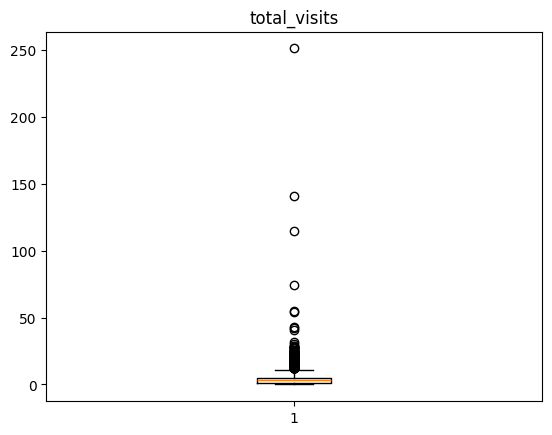

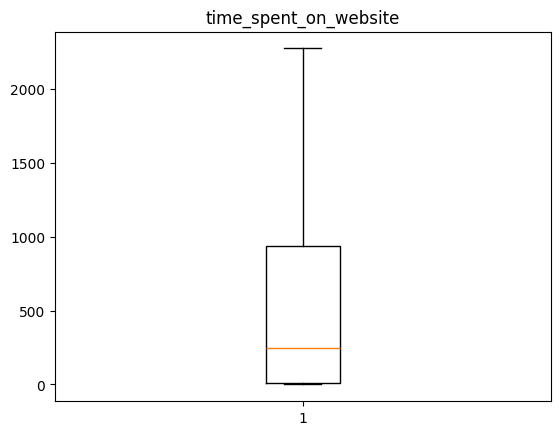

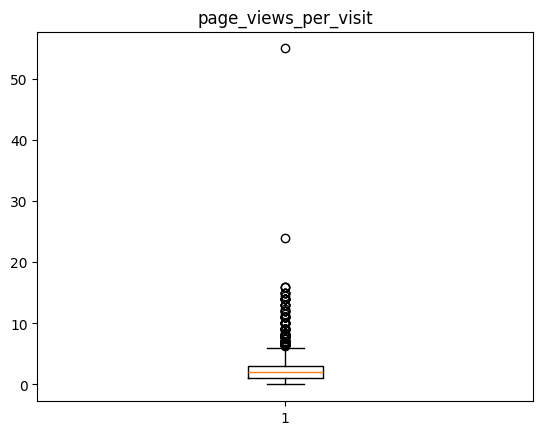

In [84]:
# let's check outliers in our numerical columns
for col in num_cols:
    plt.boxplot(leads_df[col])
    plt.title(col)
    plt.show() 

#### Inference:
- We don't have any outliers in 'time_spent_on_website' column.
- We can see outliers in total_visits and page_views_per_visit.
- Let's do the capping on both these columns and fix outliers. 

In [91]:
# let's check values at diefferent percentiles before capping
leads_df[['total_visits', 'page_views_per_visit']].quantile([0.5, 0.6, 0.7, 0.75, 0.8,.9, 0.95, 0.99, 1])

,total_visits,page_views_per_visit
0.50,3.0,2.0
0.60,3.0,2.5
0.70,4.0,3.0
0.75,5.0,3.0
0.80,5.0,4.0
0.90,7.0,5.0
0.95,10.0,6.0
0.99,17.0,9.0
1.00,251.0,55.0


- It's clear that there is a huge gap between 99th percentile value and maximum for both total_visits and page_views_per_visit. 
- Capping at 95th percentile for both total_visits and page_views_per_visit. 

In [96]:
# capping total_visits at 10 visits 
leads_df['total_visits'] = leads_df['total_visits'].apply(lambda x: 10 if x > 10 else x)

# capping page views per visit at 6
leads_df['page_views_per_visit'] = leads_df['page_views_per_visit'].apply(lambda x: 6 if x>6 else x)

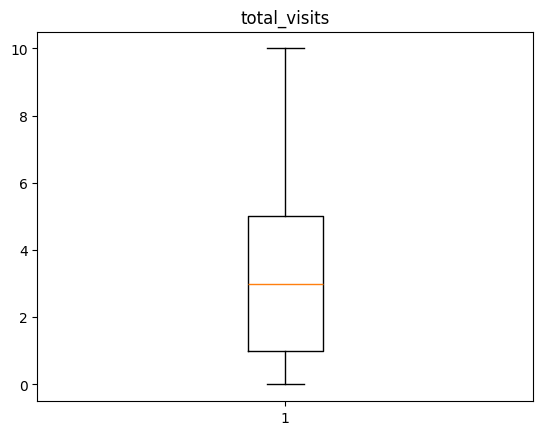

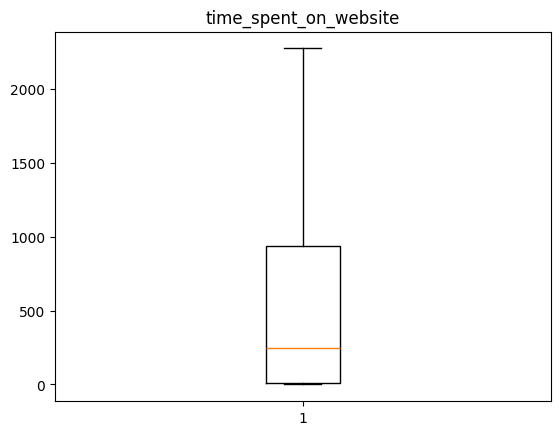

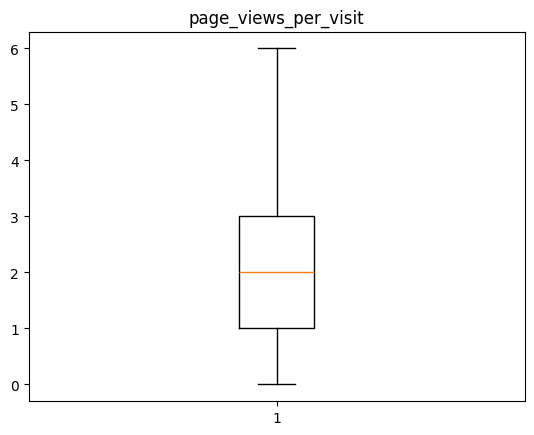

In [97]:
# let's re-plot the boxplots and check whether the capping has been done correctly or not
for col in num_cols:
    plt.boxplot(leads_df[col])
    plt.title(col)
    plt.show() 

- Capping is done correctly. 
- Data Cleaning is done. There are no nulls, duplicates, outliers in our data. 
- All the redundant columns have been removed as well. 
- Let's proceeed with **Exploratory Data Analysis** on our cleaned dataset. 

## EDA

In [113]:
# let's again check the dimensions of our cleaned dataset
leads_df.shape

(9240, 9)

### Univariate Analysis

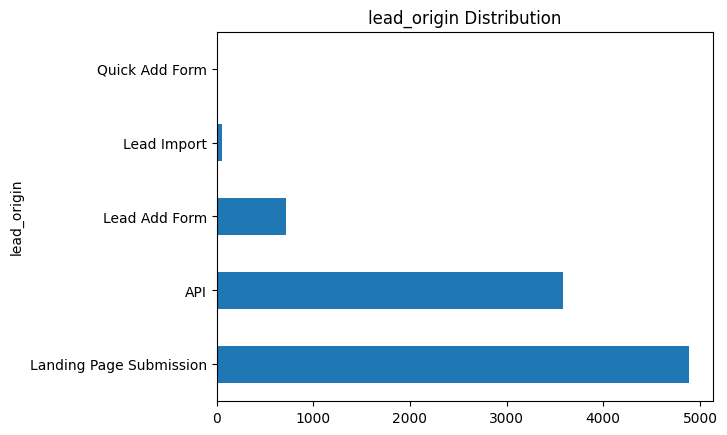

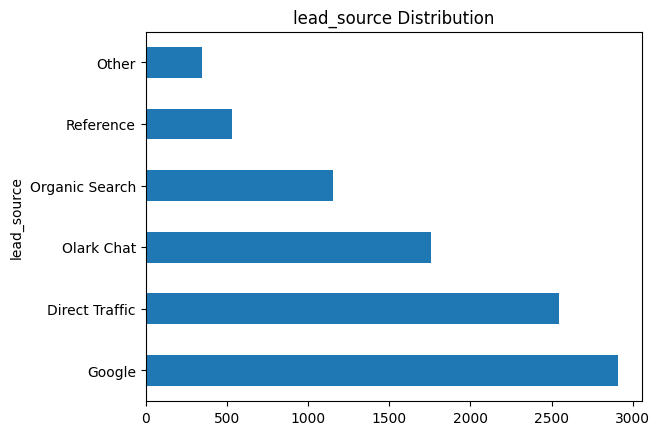

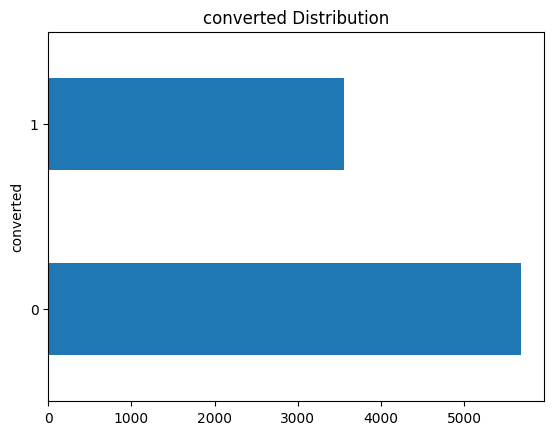

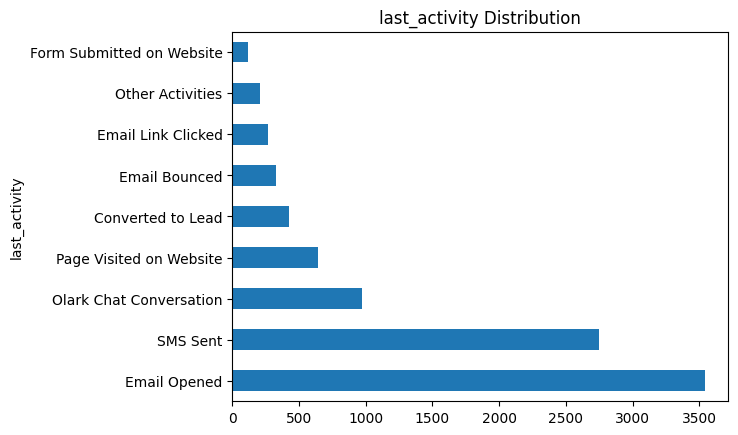

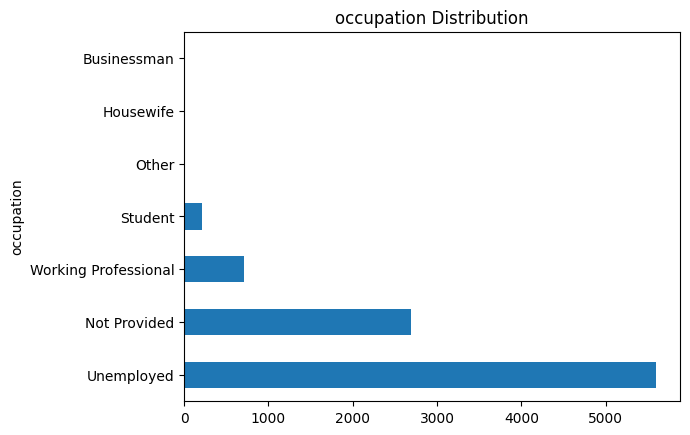

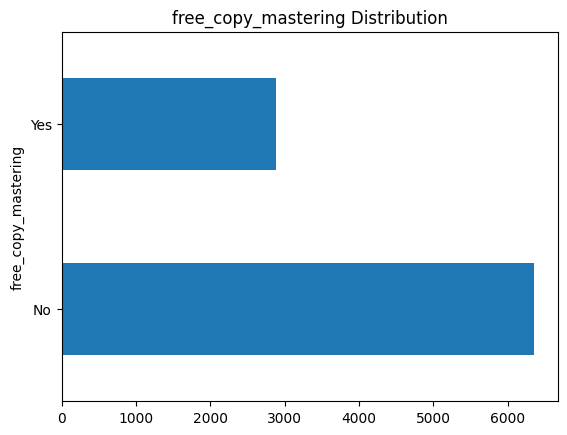

In [73]:
# plotting all categorical column's distribution 
for col in cat_cols:
    leads_df[col].value_counts().plot(kind='barh')
    plt.title('{} Distribution'.format(col)) 
    plt.show() 

##### Inference:
- **Almost 40% of the people in our data got converted which is an acceptable imbalance and we can proceed with model building without doing sampling.**
- Lead origin is highly from landing page submission followed by API. 
- Lead Source is highly from 'Google' followed by 'Direct Traffic'. 
- Most people's last activity is that they opened the email that was sent to them regarding the program.
- Most of the people coming to website and signing up are unemployed as per our data.
- Almost 1/3rd people wanted to have the free copy of the program. 

In [ ]:
np.arange(leads_df[col].min(), leads_df[col].max()+1)

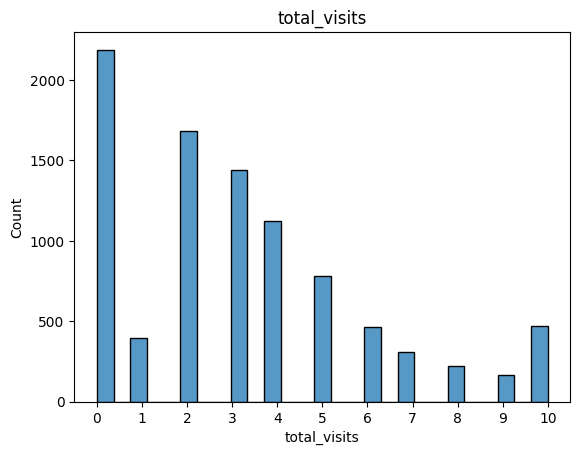

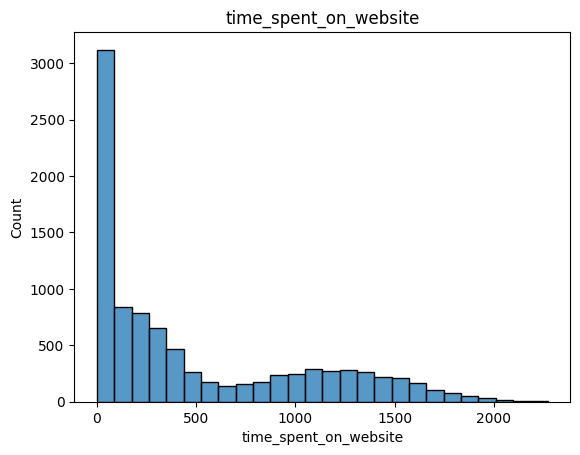

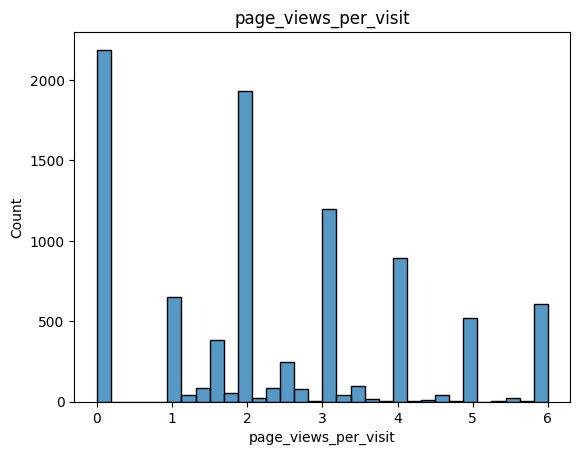

In [120]:
# let's now see the distribution of numerical columns
for col in num_cols:
    sns.histplot(leads_df[col])
    plt.title(col)
    if col != 'time_spent_on_website':
        plt.xticks(np.arange(leads_df[col].min(), leads_df[col].max()+1))
    plt.show() 

##### Inference:
- More than 2000 people have not visited our website, around 1500 have visited twice and thrice,  and this number keeps on falling with increase in visit count.
- More than 2000 people have spend 0 mins on the website. We have 600 people spending 1-60 mins on our website and almost same amount of people spending between 1-2 hrs on the website and so on. 
- Once again, more than  2000 people have not visited any page, this is simply because the same number of people did not visit the website, then 1900 people have visited 2 pages, 1200 have visited 3 pages and so on. 

### Bivariate Analysis

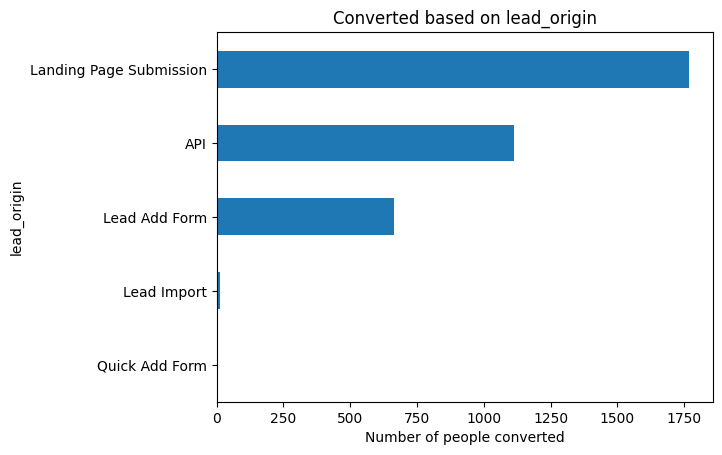

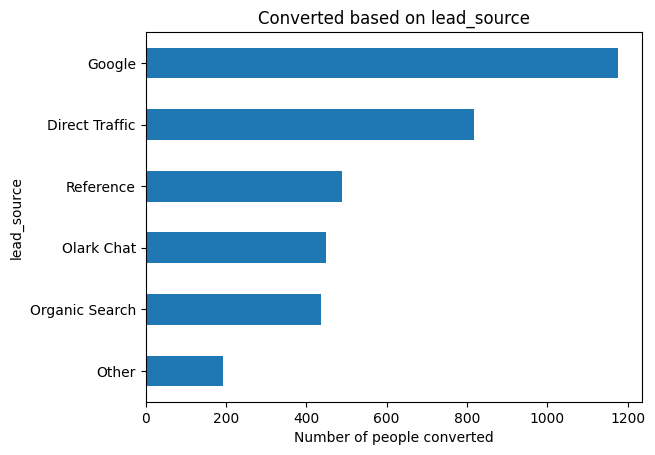

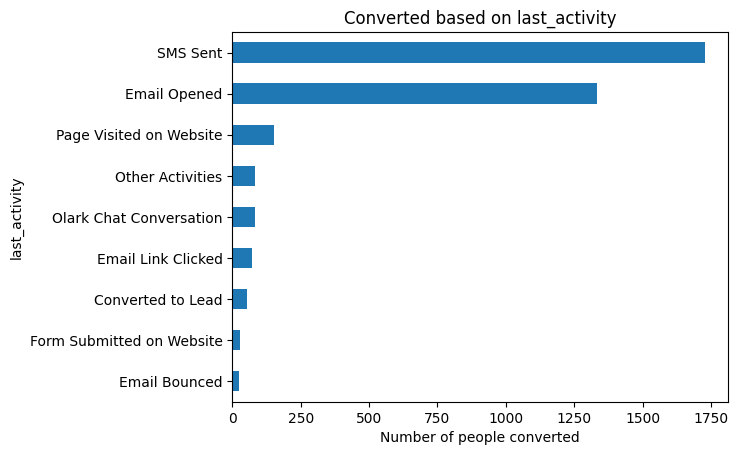

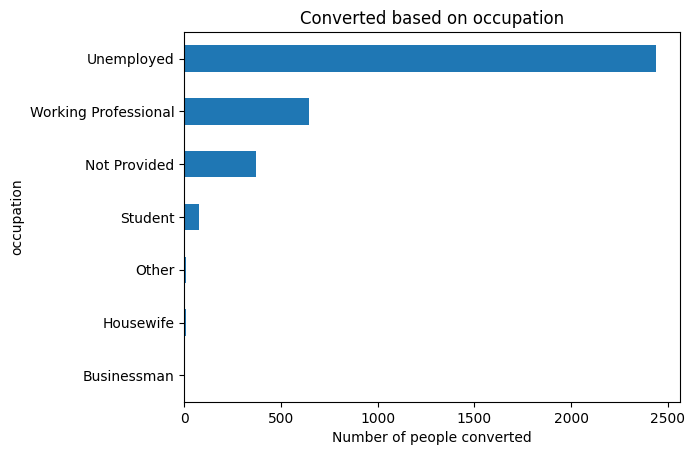

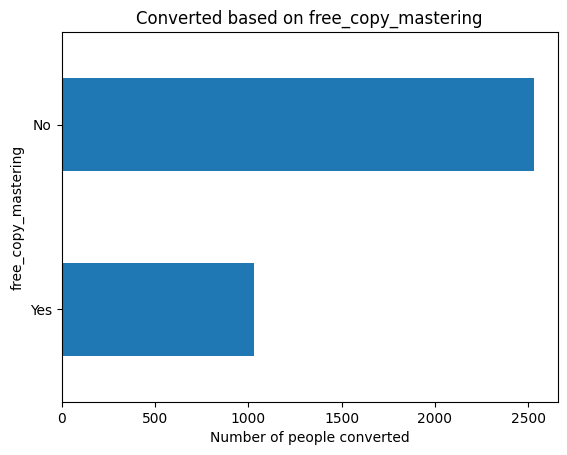

In [71]:
# checking number of people that got converted based on various factors
for col in cat_cols:
    if col != 'converted':
        leads_df.groupby(col)['converted'].sum().sort_values().plot(kind='barh')
        plt.title('Converted based on {}'.format(col))
        plt.xlabel('Number of people converted')
        plt.show()

##### Inference:
- Based on absolute terms:
    - Based on lead origin, Landing Page Submission leads to most number of conversion i.e. more than 1750. 
    - Based on lead source, people coming from Google gets converted the most i.e. ~1200.
    - People with SMS sent as their last activity got most converted i.e. ~1750 followed by Email Opened.
    - Most number of Unemployed people got converted i.e. ~2500
    - Most converted people (~2500) did not do Free copy mastering. 

In [175]:
# let's also check percentage-wise conversion based on our categorical variables

# lead_origin
lead_origin_converted = leads_df.groupby('lead_origin')['converted'].sum().to_frame().reset_index()
lead_origin = leads_df['lead_origin'].value_counts().to_frame().reset_index()
lead_origin_percent = lead_origin_converted.merge(lead_origin, how='inner', on='lead_origin')
lead_origin_percent['percentage'] = round(100 * lead_origin_percent.converted / lead_origin_percent['count'], 2)

# lead_source
lead_source_converted = leads_df.groupby('lead_source')['converted'].sum().to_frame().reset_index()
lead_source = leads_df['lead_source'].value_counts().to_frame().reset_index()
lead_source_percent = lead_source_converted.merge(lead_source, how='inner', on='lead_source')
lead_source_percent['percentage'] = round(100 * lead_source_percent.converted / lead_source_percent['count'], 2)

# last_activity
last_activity_converted = leads_df.groupby('last_activity')['converted'].sum().to_frame().reset_index()
last_activity = leads_df['last_activity'].value_counts().to_frame().reset_index()
last_activity_percent = last_activity_converted.merge(last_activity, how='inner', on='last_activity')
last_activity_percent['percentage'] = round(100 * last_activity_percent.converted / last_activity_percent['count'], 2)

# occupation
occupation_converted = leads_df.groupby('occupation')['converted'].sum().to_frame().reset_index()
occupation = leads_df['occupation'].value_counts().to_frame().reset_index()
occupation_percent = occupation_converted.merge(occupation, how='inner', on='occupation')
occupation_percent['percentage'] = round(100 * occupation_percent.converted / occupation_percent['count'], 2)

# free copy mastering
fcm_converted = leads_df.groupby('free_copy_mastering')['converted'].sum().to_frame().reset_index()
fcm = leads_df.free_copy_mastering.value_counts().to_frame().reset_index()
fcm_percent = fcm_converted.merge(fcm, how='inner', on='free_copy_mastering')
fcm_percent['percentage'] = round(100 * fcm_percent.converted / fcm_percent['count'], 2)

In [179]:
# sorting by percentage
lead_origin_percent.sort_values(by='percentage', inplace=True)
lead_source_percent.sort_values(by='percentage', inplace=True)
last_activity_percent.sort_values(by='percentage', inplace=True)
occupation_percent.sort_values(by='percentage', inplace=True) 
fcm_percent.sort_values(by='percentage', inplace=True)

In [180]:
print(lead_origin_percent, '\n')
print(lead_source_percent, '\n')
print(last_activity_percent, '\n')
print(occupation_percent, '\n')
print(fcm_percent)

               lead_origin  converted  count  percentage
3              Lead Import         13     55       23.64
0                      API       1115   3580       31.15
1  Landing Page Submission       1768   4886       36.19
2            Lead Add Form        664    718       92.48
4           Quick Add Form          1      1      100.00 

      lead_source  converted  count  percentage
2      Olark Chat        448   1755       25.53
0  Direct Traffic        818   2543       32.17
3  Organic Search        436   1154       37.78
1          Google       1176   2909       40.43
4           Other        193    345       55.94
5       Reference        490    534       91.76 

               last_activity  converted  count  percentage
1              Email Bounced         26    326        7.98
5    Olark Chat Conversation         84    973        8.63
0          Converted to Lead         54    428       12.62
7    Page Visited on Website        151    640       23.59
4  Form Submitted on We

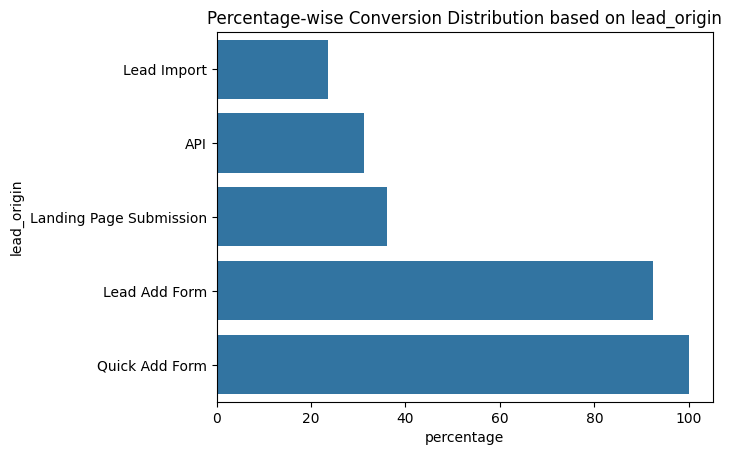

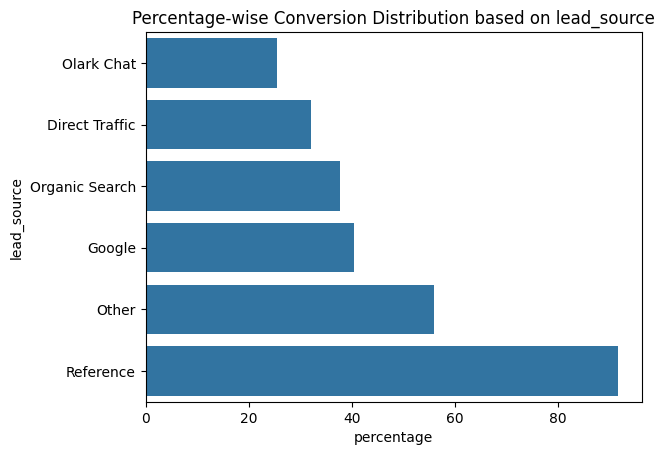

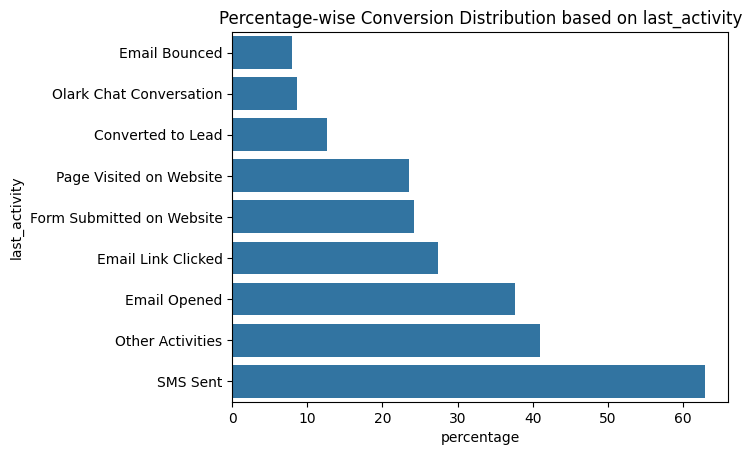

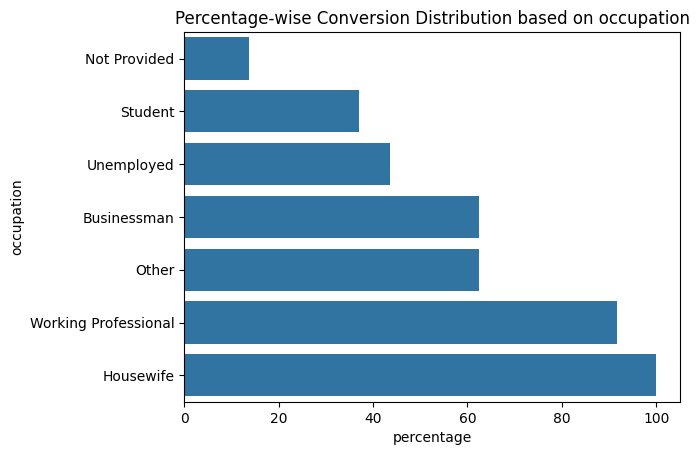

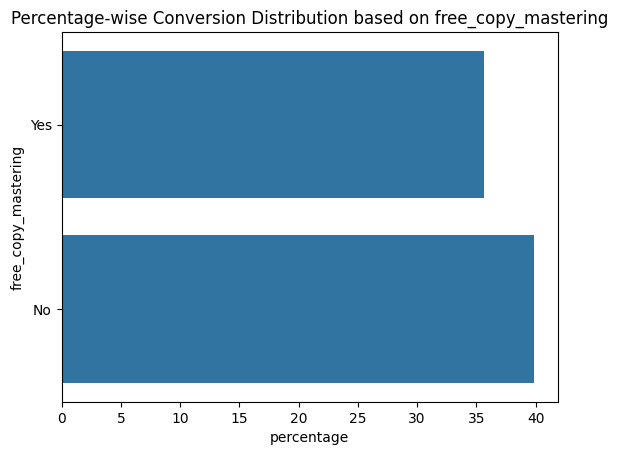

In [214]:
percentage_wise_cols = [lead_origin_percent, lead_source_percent, last_activity_percent, 
                        occupation_percent, fcm_percent]

# loop to plot bar plots based on percentage conversion for each category 
for df in percentage_wise_cols:
    sns.barplot(y=df.iloc[0:, 0], x=df.iloc[0:, 3], orient='h')
    plt.title('Percentage-wise Conversion Distribution based on {}'.format(df.columns[0]))
    plt.show()

##### Inference:
- Based on percentage coversion:
    - Based on lead origin, all leads from **Quick add form got converted showing a 100%.** conversion rate followed by **92% conversion rate from lead add form.**
    - Based on lead source, a **92% conversion rate if lead is a reference.** 
    - Based on last activity, **SMS sent has 62% conversion rate.** SMS sent is the last activity showing high conversion based on both absolute and percentage-wise terms. 
    - **All Houswives got converted showing a 100% conversion rate** followed by **working professionals that also show a very high ~92% conversion rate.**
    - Conversion rate is same only, around 35%, for people with/without free copy mastering. 

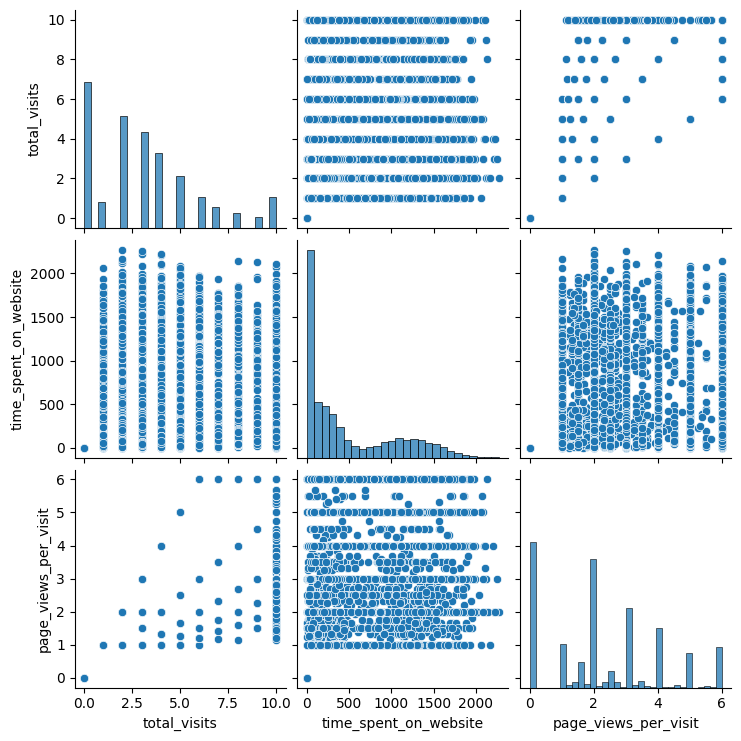

In [132]:
# let's plot pairplots to see the correlation between our numerical variables
sns.pairplot(leads_df[num_cols])
plt.show()

##### Inference:
- We can only see a positive correlation between page_views_per_visit and total_visits. 
- This makes sense as well since if less people will visit the website, the count for page views will also be less and vice versa. 

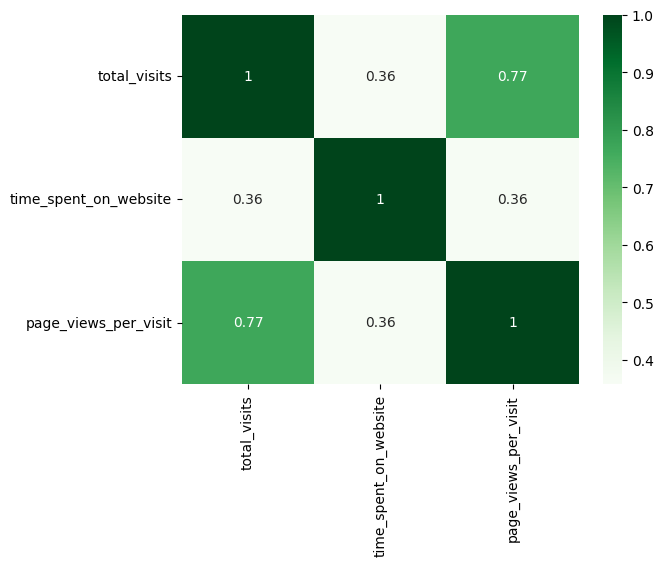

In [148]:
# also plot a heatmap to see the pearson correlation between numberical variables
sns.heatmap(leads_df[num_cols].corr(), annot=True, cmap='Greens')
plt.show()

##### Inference:
- There is a positive correlation between page_views_per_visit and total_views. 
- Let's keep these variables for now and build our model and if we found **multicollinearity** then we'll drop the one causing it.

## Dummy Variables Creation